In [1]:
import numpy as np
from numpy.linalg import matrix_power, eigvals
import pandas as pd
from matplotlib import pyplot as plt

In [14]:
p_var = .25
r_var = .5
q_var = 1 - p_var - r_var
N = 10

def create_transition(p, r, q, N):
    head = np.array([p_var + r_var, q_var] + [0 for _ in range(N-2)])
    tail = np.array([0 for _ in range(N-2)] + [p_var, r_var + q_var])
    body = np.array([p_var, r_var, q_var] + [0 for _ in range(N-3)])
    return np.stack([head] + [np.roll(body, i) for i in range(N-2)] + [tail])

def get_eigen(P):
    return np.sort(eigvals(P))[-2]

In [15]:
# Plot evolution of eigenvalues of transition matrix
x = np.arange(3, 100)
y = np.array([get_eigen(create_transition(p_var, r_var, q_var, k)) for k in x])

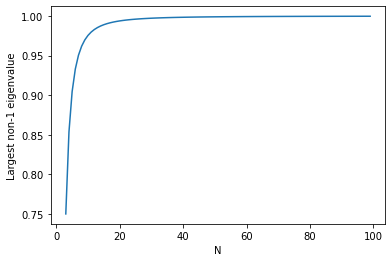

In [17]:
plt.plot(x, y)
plt.xlabel("N")
plt.ylabel("Largest non-1 eigenvalue")
plt.show()

# Simulations

In [18]:
K = 5
M = 1000
P = create_transition(p_var, r_var, q_var, N)

# Theoretical Target
pi = np.array([((i+1)/N)**K - (i/N)**K for i in range(N)])

for t in range(100):
    P_t = matrix_power(P, t+1)
    